# Predicting Heart Disease

<img src="https://www.scripps.edu/_files/images/science-and-medicines/600x400_heart_illustration_xray.jpg" width="800" height="200">

Cardiovascular diseases (CVDs) remain a leading cause of mortality globally, with an estimated 17.9 million people succumbing to it annually. The [World Health Organization (WHO)](https://www.who.int/health-topics/cardiovascular-diseases) considers CVDs to be a serious public health challenge and recommends early identification of risk factors as a crucial step towards reducing the burden of these diseases. Risk factors such as unhealthy diet, physical inactivity, and mental illness are known to contribute significantly to the development of CVDs. Therefore, it is imperative to identify these risk factors early on to prevent the onset of CVDs and reduce premature deaths.

## Project and Data Overview

Our R&D company specializes in healthcare solutions and has collected anonymized data from multiple hospitals on several patients to predict the likelihood of a new patient having heart disease in the future. The [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction) includes relevant information for each patient, such as personal information and medical data, including whether or not they have had heart disease before.

The dataset features are:

- `Age`: age of the patient [years]
- `Sex`: sex of the patient [M: Male, F: Female]
- `ChestPainType`: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- `RestingBP`: resting blood pressure [mm Hg]
- `Cholesterol`: serum cholesterol [mm/dl]
- `FastingBS`: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- `RestingECG`: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- `MaxHR`: maximum heart rate achieved [Numeric value between 60 and 202]
- `ExerciseAngina`: exercise-induced angina [Y: Yes, N: No]
- `Oldpeak`: oldpeak = ST [Numeric value measured in depression]
- `ST_Slope`: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- `HeartDisease`: output class [1: heart disease, 0: Normal]

To accurately predict the likelihood of a new patient having heart disease in the future, we will conduct exploratory data analysis on the dataset before building a model.

## Import Libraries and Read Data

To proceed with the Exploratory Data Analysis (EDA) phase, we first need to ensure that the necessary libraries for the project have been imported and the dataset has been loaded into our environment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

%matplotlib inline                 
#used to visualize matplotlib code

#encoding types:(UTF-8, ASCII, Windows-1252, ISO-8859-1)

In [2]:
data = "C:\Data Science\Test Data\heart.csv"
heart = pd.read_csv(data)

In [3]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
heart.shape

(918, 12)

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
heart.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Based on the descriptive statistics, here are some of the observations that we can make:

- The average age of patients is ~53 years.
- The median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.
- RestingBP and Cholesterol have a minimum value of zero.
- There don't seem to be any missing values in these columns.

# EDA: Visualizations

In [9]:
#Calculating missing values in all columns
heart.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

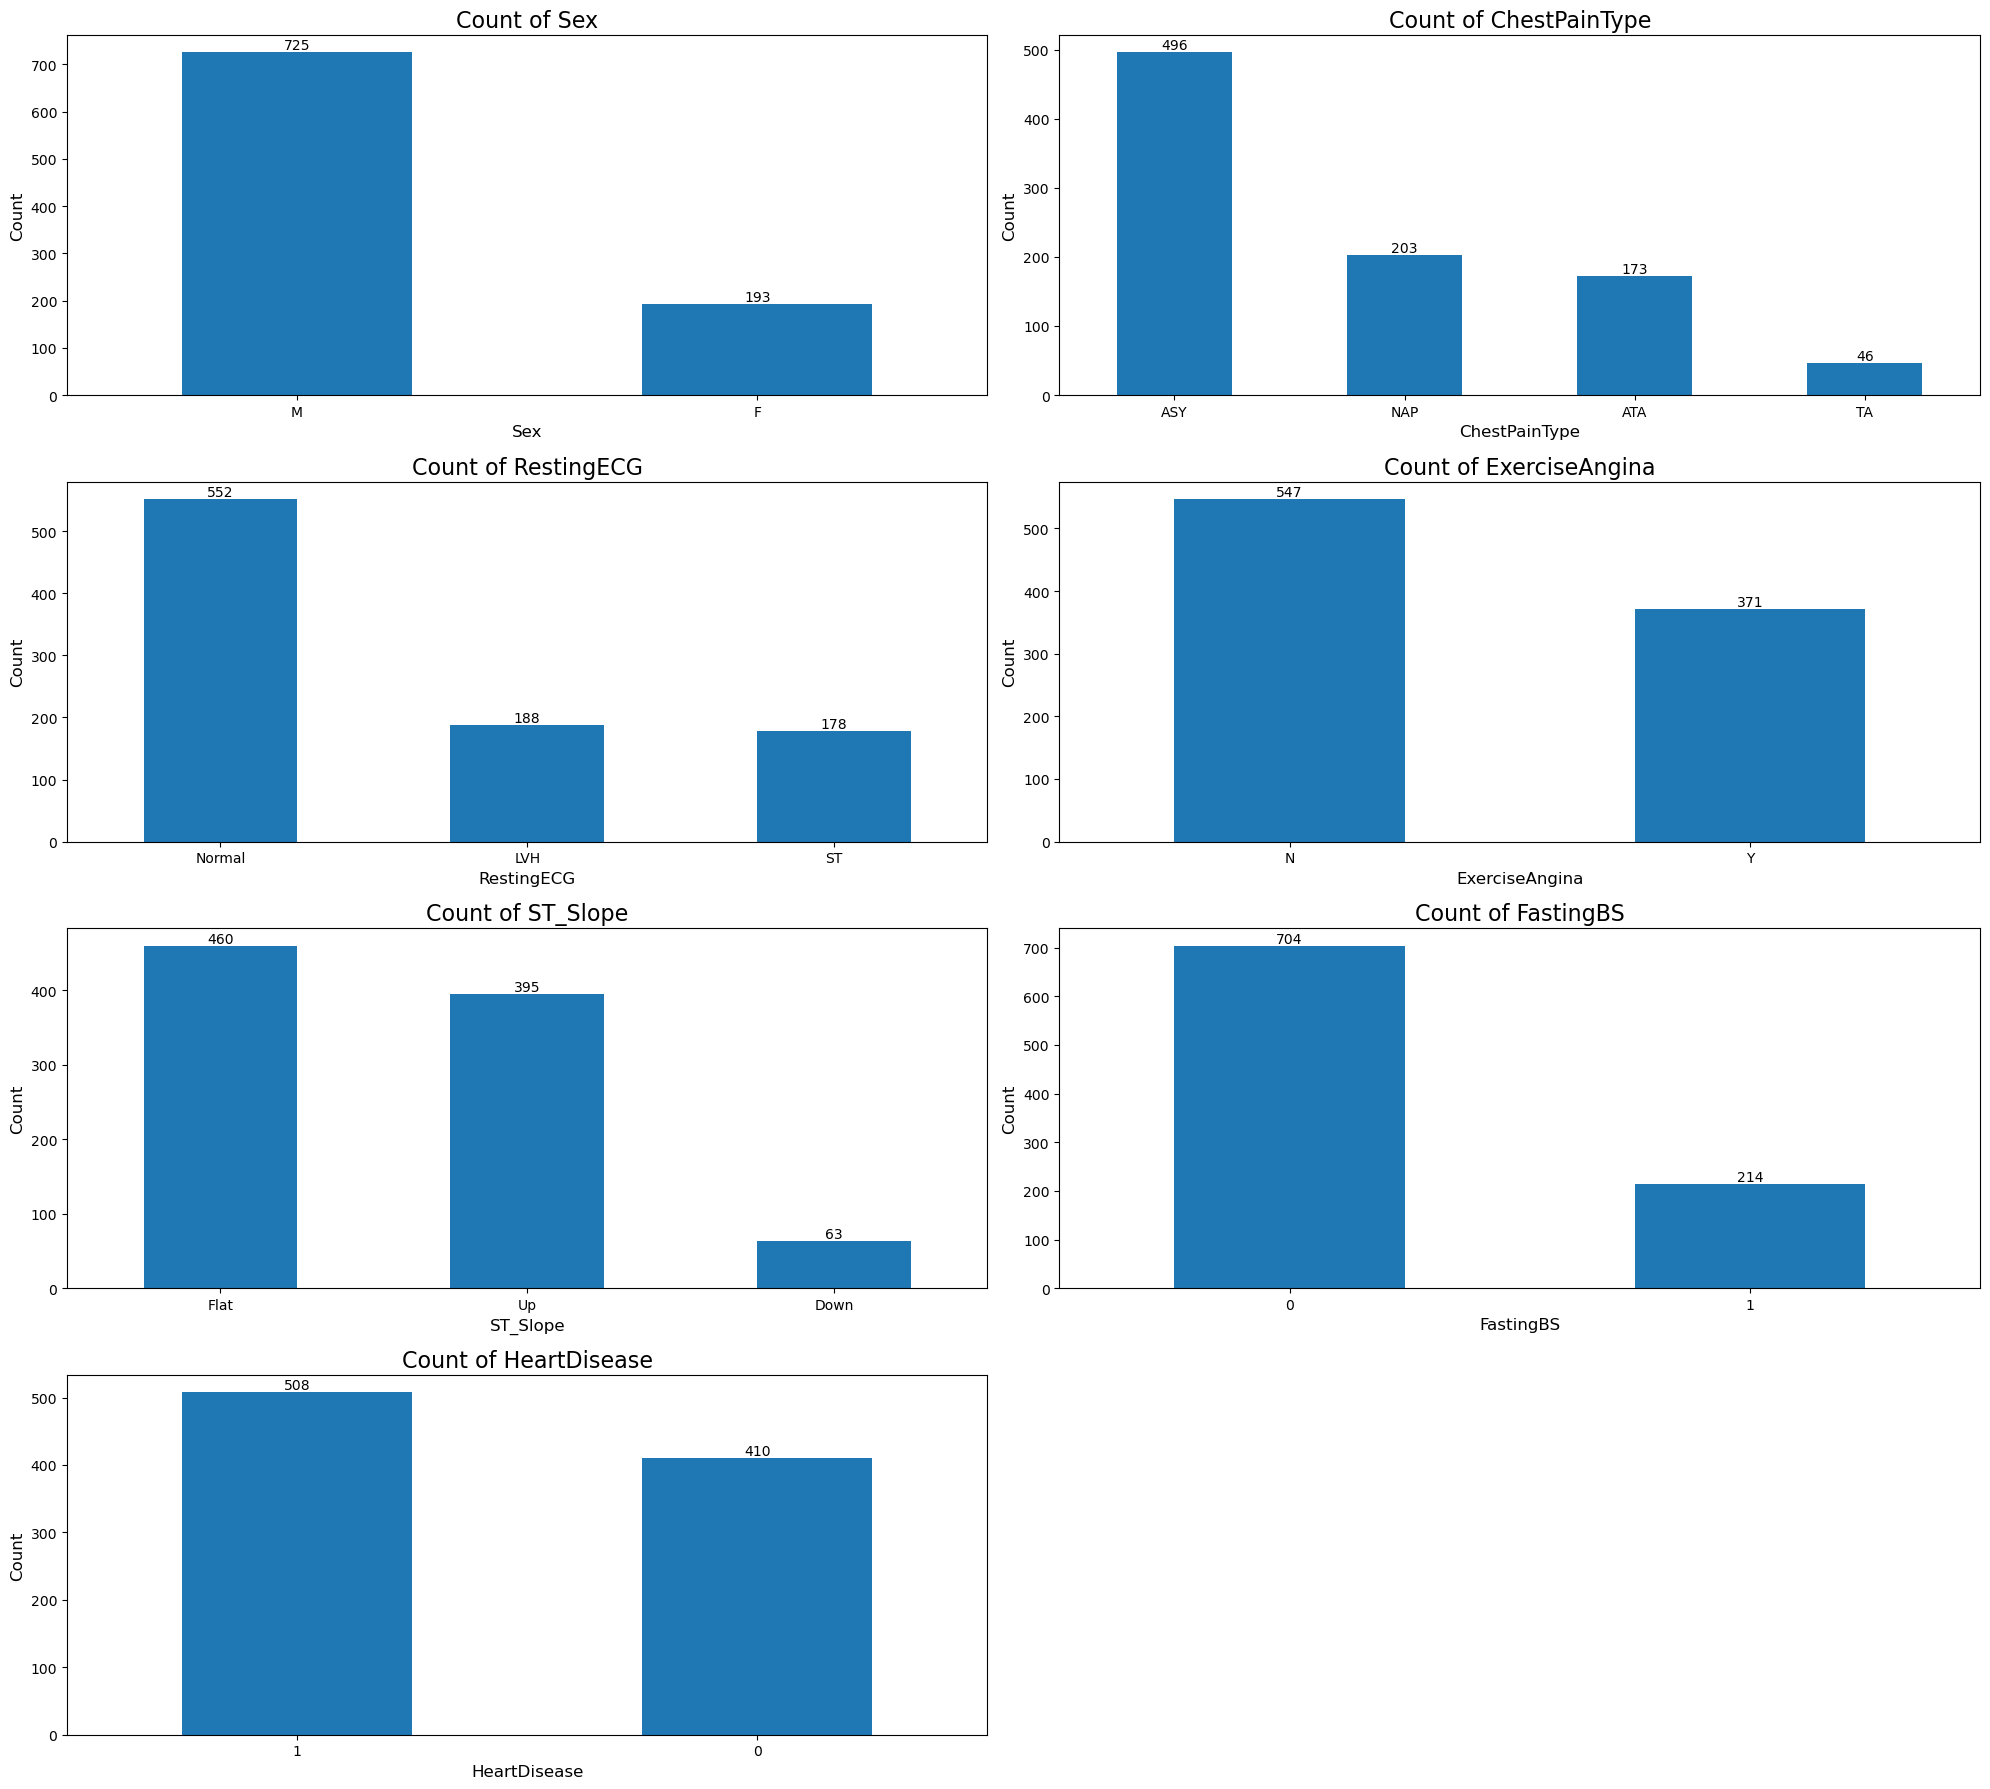

In [10]:
#Visualizng The data 
# Create a list of categorical columns
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS', 'HeartDisease']

#define the n of rows and n of columns
num_rows = 4
num_cols = 2

#set up the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,18))

#Loop over each categorical column to create a bar plot
for i, col in enumerate(cat_cols):
    #calculate the row and column index for the current subplot
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    #count the number of rows for each category in the column (freq distro)
    counts=heart[col].value_counts()
    
    #create a bar plot of the counts in the current subplot
    ax = counts.plot(kind='bar', rot=0, color='#1f77b4', ax=axes[row_idx, col_idx])
    
    #add labels for the x and y axes
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    
    #adda title for the plot
    ax.set_title(f"Count of {col}", size=16)
    
    #add data labels to the bar
    for i in ax.containers:
        ax.bar_label(i, label_type='edge')
        
 # If there are not enough columns to fill in the last row, create a blank plot
if len(cat_cols) % num_cols != 0:
    blank_ax = axes[num_rows-1, num_cols-1]
    blank_ax.axis('off')

# Adjust the spacing between subplots
fig.tight_layout()
plt.show()


Here are some relevant insights that can be gathered from the plots:

- There are more male patients (725), than female patients (193)
- Most patients (496) have chest pain "ASY" (Asympomatic), followed by "NAP" (Non-Anginal pain) & "ATA" (Atypical Angina), with "TA" (Typical Angina) being the lowest recorded chest pain type among patients
- Most patients (552) have normal resting electrocardiogram ECG, while (188) have LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria, and (178) have ST: having ST-T wave abnormality
- There are more patients without Exercise-induced Angina (547) than without (371)
- Most patients (460) have a flat ST segment slope during peak exercise, while 395 have an upward sloping ST segment and only 63 have a downward sloping ST segment.
- The majority of patients (704) have a fasting blood sugar level below 120 mg/dl, while 214 have a level equal to or above 120 mg/dl.
- There are more patients with heart disease (508) than without (410).

Now our next step is to create bar charts for every categorical column in the dataset, including `FastingBS`. These bar charts will display the number of rows for each category of that column, grouped by `HeartDisease`.

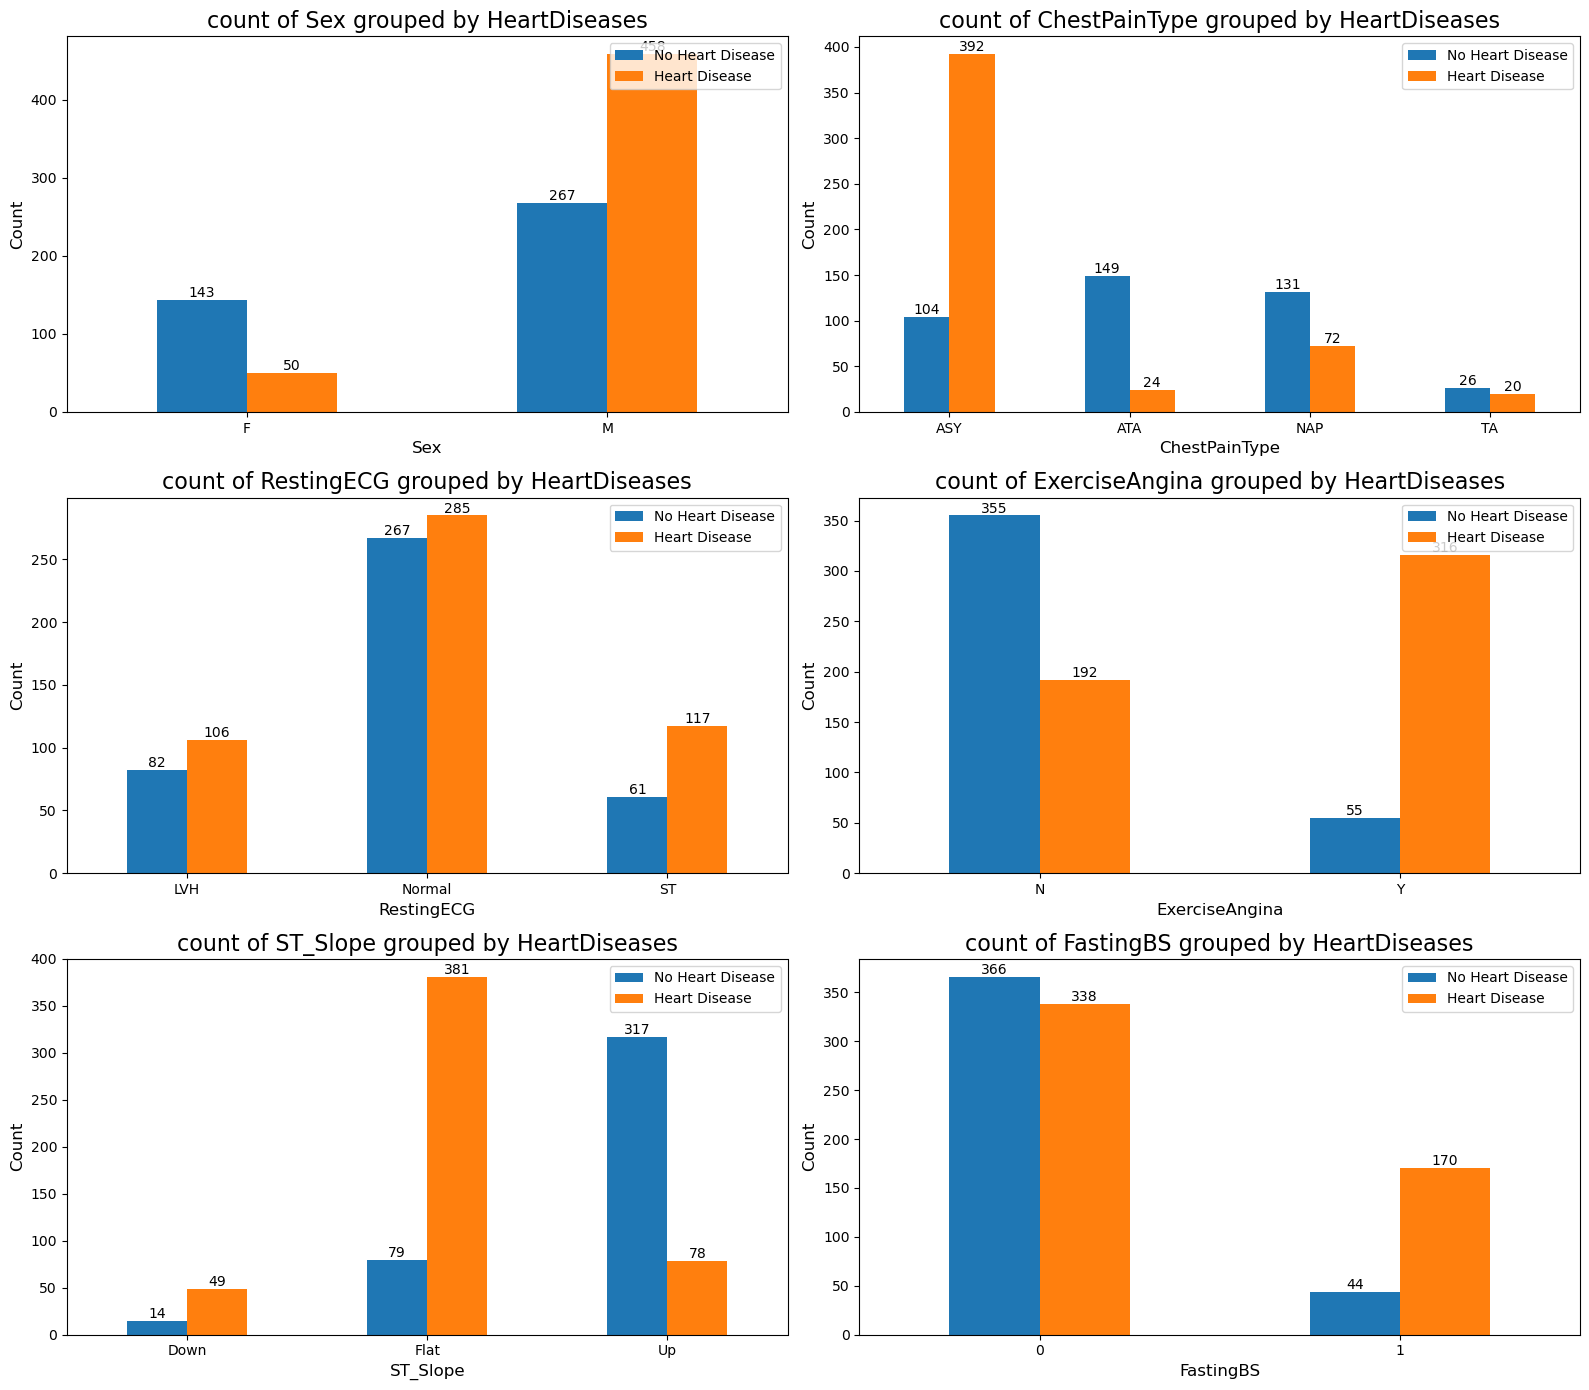

In [11]:
# Exclude 'HeartDiseases' column for grouping
cat_cols_2 = cat_cols[:-1]

#set up the subplots 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,14))

#Loop over each categorical column
for i, col in enumerate(cat_cols_2):
    #calculate the row and column index for the current subplot
    row_idx = i // 2
    col_idx = i % 2
    
    #group data by 'HeartDisease' and the categorical column
    counts = heart.groupby(['HeartDisease', col]).size().reset_index(name='count') 
    
    #create  bar chart
    ax = counts.pivot(index=col, columns='HeartDisease', values='count').plot(kind='bar', rot=0, ax=axes[row_idx, col_idx])
    
    #add label and title 
    ax.set_xlabel(col, size=12)
    ax.set_ylabel('Count', size=12)
    ax.set_title(f'count of {col} grouped by HeartDiseases',size=16)
    
    # Add legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=['No Heart Disease', 'Heart Disease'], loc='upper right')
    
    # Add data labels above each bar
    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x() + p.get_width() / 2., p.get_height()), xytext=(0, 5), 
                    textcoords='offset points', ha='center', va='center')
        
plt.tight_layout()
plt.show()


Here are some relevant insights that can be gathered from the plots:

- Heart diseases are more common among Male patients (458) than Female patients (50)
- "ASY" (Asympomatic) is the most common chest pain type among heart disease patients (392), while "ATA" (Atypical Angina) is the most common among non-heart disease patients (149)
- The majority of patients, both with and without heart disease, have a normal resting electrocardiogram (ECG).
- Exercise-induced angina is more common among patients with heart disease (316) compared to those without heart disease (55).
- Flat ST slope is the most common type among patients with heart disease, while up-sloping ST segment is the most common among patients without heart disease.
- Patients with heart disease are more likely to have fasting blood sugar levels greater than 120 mg/dL compared to those without heart disease.

We will continue our exploration of the data by creating various groupings and visualizations to extract more insights. Two questions that we will focus on are:

- What percentage of patients with heart disease are male and over 50 years old?
- What is the median age of patients who were diagnosed with heart disease?

We will begin with the first question: `What percentage of patients with heart disease are male and over 50 years old?`

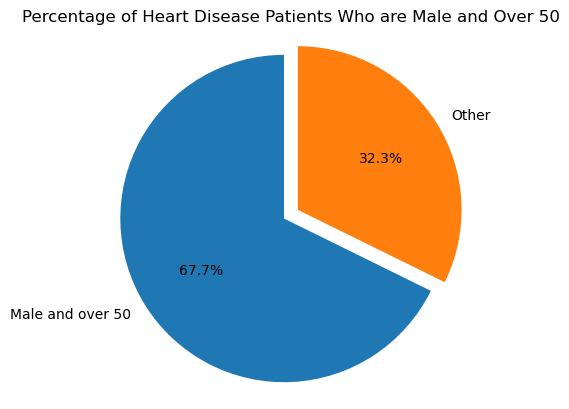

In [12]:
# filter for patients with heart diseases
heart_diseases = heart[heart['HeartDisease'] == 1]

# Calculate percentage of patients with heart disease who are male and over 50 years old
male_over_50 = ((heart_diseases['Sex'] == 'M') & (heart_diseases['Age'] > 50)).sum()
total_heart_diseases = len(heart_diseases)
percent_male_over_50 = male_over_50 / total_heart_diseases * 100

# create pie chart 
labels = ['Male and over 50', 'Other']
sizes = [percent_male_over_50, 100 - percent_male_over_50]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Percentage of Heart Disease Patients Who are Male and Over 50')
plt.show()


The graph above shows that (67.7%) of Males that are over the age of 50 are patients of heart diseases. this is a significant finding as it indicates that there maybe a higher risk of developing heart diseases for males that are over the age of 50

Moving on to the second question: `What is the median age of patients who were diagnosed with heart disease?`

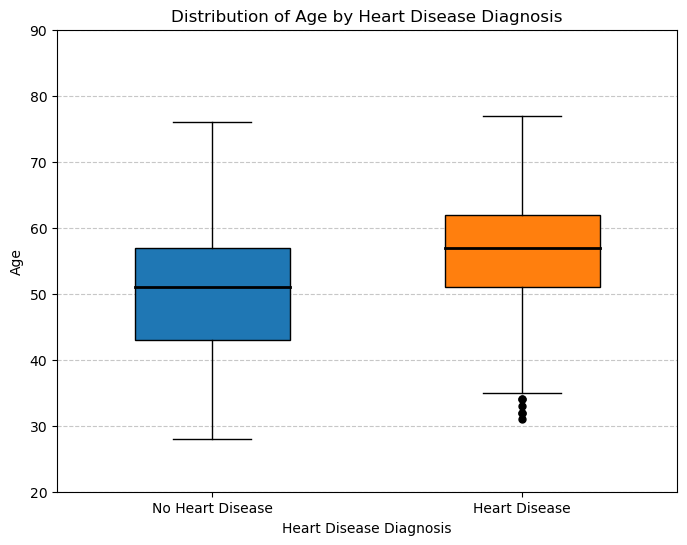

In [13]:
# Set figure size
plt.figure(figsize=(8, 6))

# Create box plot
bp = plt.boxplot(x=[heart[heart['HeartDisease'] == 0]['Age'], heart[heart['HeartDisease'] == 1]['Age']],
                 labels=['No Heart Disease', 'Heart Disease'], patch_artist=True, widths=0.5, showfliers=True,
                 flierprops={'marker':'o', 'markerfacecolor':'black', 'markersize':5})

# Set boxplot colors
colors = ['#1f77b4', '#ff7f0e']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Set median line color
for median in bp['medians']:
    median.set(color='black', linewidth=2)

# Set axis labels and title
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Age')
plt.title('Distribution of Age by Heart Disease Diagnosis')

# Set y-axis range
plt.ylim(20, 90)

# Add horizontal grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Based on the boxplot visualization, we can see that the median age of patients without heart disease is 51 years old, while the median age of patients with heart disease is 57 years old. This suggests that age may be a risk factor for developing heart disease, as the median age of those with heart disease is higher than those without. However, it's important to note that there is overlap in the age distributions of those with and without heart disease, indicating that age is not the only factor influencing the development 


# Data Cleaning

let's clean up the data. We identified that there are no missing values. However, as we noticed earlier, a couple of columns have 0 values that don't make sense.

There are a few ways we can handle these values:

- We could remove those rows entirely if their frequency of occurrence is low.
- We could impute those zeros with the median value of that column or the median value of the column grouped by HeartDisease.
- We could try some complex approaches. For example, instead of using the median of the entire column, maybe we could look at the median of the values grouped by the age, sex, and/or resting ECG of the patient. The resting blood pressure of a female in her 30s with a normal ECG might be lower than what we would get from the median of the entire column.

In [14]:
print(f"Number of rows that have 0 values for RestingBP: {(heart['RestingBP'] == 0).sum()}")
print(f"Number of rows that have 0 values for Cholesterol: {(heart['Cholesterol'] == 0).sum()}")

Number of rows that have 0 values for RestingBP: 1
Number of rows that have 0 values for Cholesterol: 172


Since our dataset only contains 918 rows, dropping 172 rows from the `Cholesterol` column is not ideal as we would lose a significant amount of data, leaving us with only 746 rows. Therefore, we will opt for the second approach of imputing zeros with the median value of the column or the median value of the column grouped by `HeartDisease`.

*Note*: This approach will only work if there are no missing values in the `HeartDisease` column.

In [15]:
heart_clean = heart.copy()

# impute 0 values in 'RestingBP' with median value of the column grouped by 'HeartDisease'
heart_clean['RestingBP'] = heart_clean.groupby('HeartDisease')['RestingBP'].apply(lambda x: x.replace(0, x.median()))

# impute 0 values in 'Cholesterol' with median value of the column grouped by 'HeartDisease'
heart_clean['Cholesterol'] = heart_clean.groupby('HeartDisease')['Cholesterol'].apply(lambda x: x.replace(0, x.median()))



C:\Users\abdul\AppData\Local\Temp\ipykernel_17804\565637214.py:4: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  heart_clean['RestingBP'] = heart_clean.groupby('HeartDisease')['RestingBP'].apply(lambda x: x.replace(0, x.median()))
C:\Users\abdul\AppData\Local\Temp\ipykernel_17804\565637214.py:7: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning

Lets verify the number of rows with 0 values in '`RestingBp'` and `'Cholesterol'` after the imputation process

In [16]:
heart_clean[['RestingBP', 'Cholesterol']].describe()

,RestingBP,Cholesterol
count,918.000000,918.000000
mean,132.540305,239.675381
std,17.989941,54.328249
min,80.000000,85.000000
25%,120.000000,214.000000
50%,130.000000,225.000000
75%,140.000000,267.000000
max,200.000000,603.000000


The min values for both columns have been updated and there are no more 0 values

# Feature Selection

Now that we've cleaned our data, we can select features for our model. Thanks to our EDA and a general understanding of the features, we can identify some of the features that we could start with:

- Age
- Sex
- ChestPainType
- Cholesterol
- FastingBS

Please note: The above list of features is not exhaustive. You're encouraged to select different features for your model. If you do, make sure to provide reasoning for selecting those features.

We'll also explore how the columns correlate to one another. Before we attempt that, we'll convert our categorical columns into dummy variables.

In [17]:
# Convert categorical variable into dummy variables
heart_clean = pd.get_dummies(heart_clean, drop_first=True)

# View results
heart_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


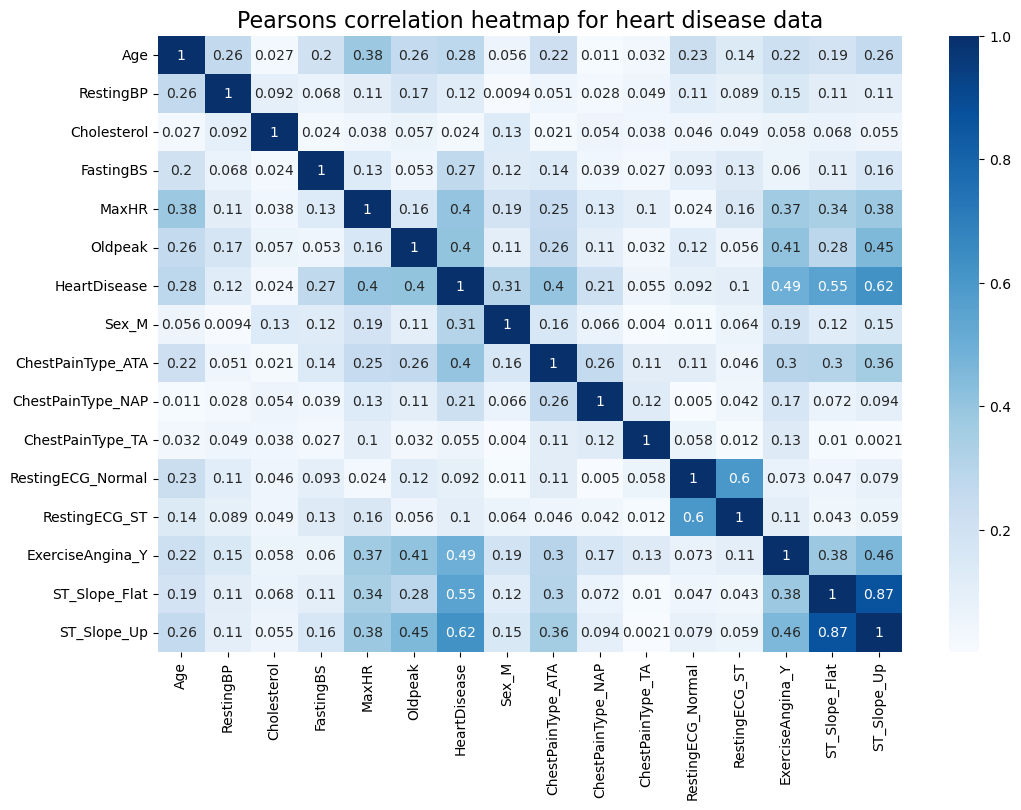

In [18]:
# create a pearson's correlation heatmap using seaborn
corr_mat = abs(heart_clean.corr())

#  visulaize the data
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat, annot=True, cmap='Blues')
plt.title('Pearsons correlation heatmap for heart disease data', fontsize=16)
plt.show()

Let's determine which features are moderately correlated to `HeartDisease` by analyzing the heat map.

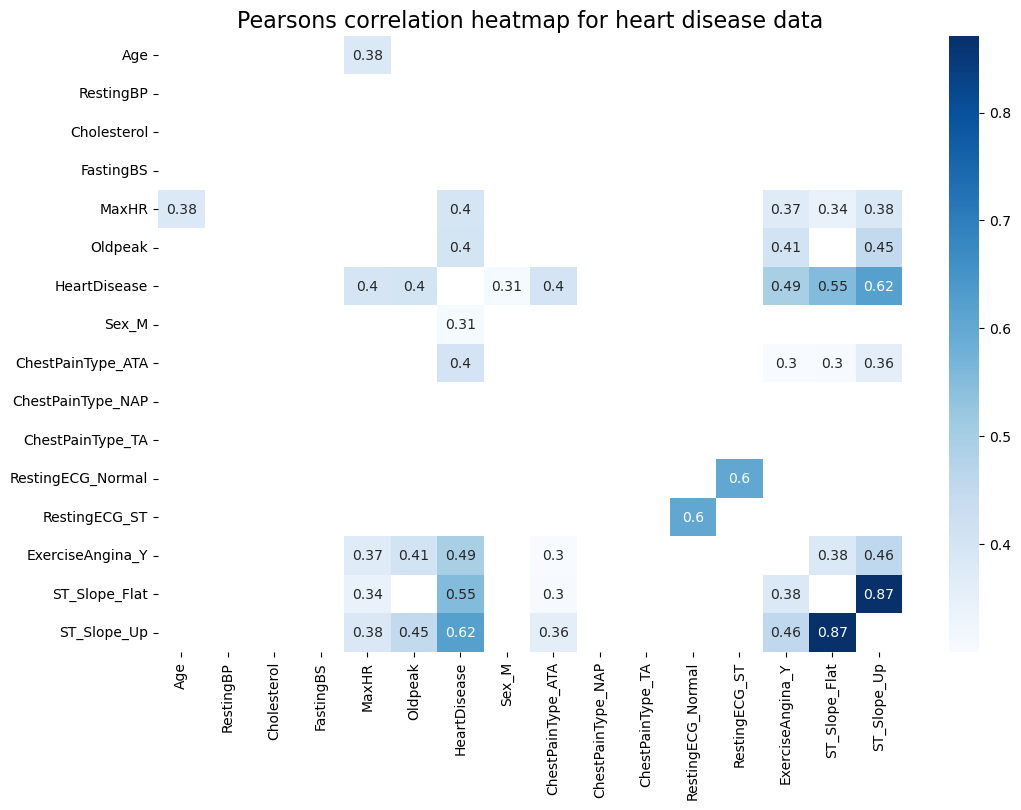

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr_mat[(corr_mat > 0.3) & (corr_mat < 1)], annot=True, cmap='Blues')
plt.title('Pearsons correlation heatmap for heart disease data', fontsize=16)
plt.show()

### Square of the Pearson correlation coefficient

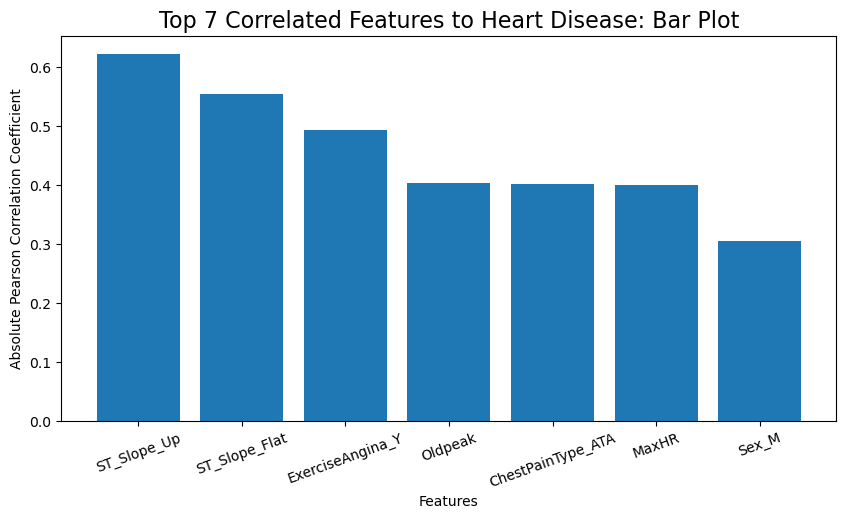

In [25]:
# Select top 7 features using square of the Pearson correlation
top_7_features = (corr_mat['HeartDisease'] ** 2).sort_values(ascending=False)[1:8].index.tolist()

# Create bar plot
plt.figure(figsize=(10, 5))
plt.bar(x=top_7_features, height=corr_mat.loc[top_7_features, 'HeartDisease'])
plt.xticks(rotation=20)
plt.title('Top 7 Correlated Features to Heart Disease: Bar Plot', fontsize=16)
plt.ylabel('Absolute Pearson Correlation Coefficient')
plt.xlabel('Features')
plt.show()

After analyzing the correlation heat map, we have identified the following features to have a positive correlation (with a correlation coefficient greater than 0.3) to `HeartDisease`:

- `Oldpeak`
    - It's worth noting that we could also select `MaxHR` or `ChestPainType_ATA` as additional features to consider.
- `Sex_M`
    - Although it has a relatively low correlation coefficient, we have decided to take it into account based on our EDA observations.
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

Interestingly, `Cholesterol` is not strongly correlated to `HeartDisease`, so we can consider ignoring it for now.

Based on our findings, we can narrow down the features that may be relevant and proceed with creating and training multiple models using one feature at a time.


## Single-Feature Classifier Building

We will begin by creating a separate model for each of the selected features and evaluating their performance using accuracy as a metric. In order to determine the optimal split percentage, we will experiment with different values of test_size. First, we need to split the data into training and validation sets.

In [21]:
# split the data

X = heart_clean.drop('HeartDisease', axis=1)
y = heart_clean['HeartDisease']

# Create list of selected features
sel_features = [
                'Oldpeak',
                'Sex_M',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Create list of test sizes to experiment with
test_sizes = [0.10, 0.15, 0.20, 0.25]

# Create dictionary of dictionaries to store results
results = {}

# Loop over test sizes
for test_size in test_sizes:
    # Split data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                      test_size=test_size,
                                                      random_state=42)
    
    # Create dictionary to store results for currect test size
    test_results = {}
    
    # Loop over selected features
    for feature in sel_features:
        # Fit knn classifier with current feature set
        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train[[feature]], y_train)
        
        # Evaluate accuracy on validation set
        accuracy = knn.score(X_val[[feature]], y_val)
        
        # Store accuracy in test_results dictionary
        test_results[feature] = round(accuracy, 4)
        
    # Store results from current test size in main dictionary
    results[test_size] = test_results
    

To gain a better understanding of our findings, we can create a DataFrame from the `results` dictionary. This will allow us to easily view the accuracy scores for each feature set and test size value combination.

In [22]:
# Create list to store dictionaries
results_list = []

# Loop over test size values
for size, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with test size, feature and accuracy keys
        result_dict = {'size': size, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
test_size_df = pd.DataFrame(results_list)
test_size_df

,size,feature,accuracy
0,0.10,Oldpeak,0.6848
1,0.10,Sex_M,0.4130
2,0.10,ExerciseAngina_Y,0.6630
3,0.10,ST_Slope_Flat,0.5870
4,0.10,ST_Slope_Up,0.7935
5,0.15,Oldpeak,0.7029
6,0.15,Sex_M,0.4058
7,0.15,ExerciseAngina_Y,0.6522
8,0.15,ST_Slope_Flat,0.7319
9,0.15,ST_Slope_Up,0.7899


Based on the results, the following findings can be made:

- The selected features have different impacts on the accuracy of the KNN classifier. `ST_Slope_Up` consistently shows the highest accuracy across all test sizes, while `Sex_M` consistently shows the lowest accuracy.
- The optimal test size depends on the selected features. For example, when using the `Oldpeak` feature, the optimal test size is 0.15, while when using the `ST_Slope_Up` feature, the optimal test size is 0.25.
- Overall, the accuracy of the KNN classifier is relatively low, ranging from 0.413 to 0.8. This suggests that the selected features may not be sufficient to accurately predict heart disease, and other features or more complex models may be necessary.
- It is important to note that the results obtained may be sensitive to the number of neighbors `(n_neighbors)` used in the KNN classifier. Therefore, to obtain reliable results, it is recommended to run the analysis multiple times with different values of `n_neighbors` and compare the results.
- Based on the given results, a test size of 0.15 or 0.2 may be a good choice to balance the trade-off between variance and bias.

We have decided to proceed with a test size of 0.15 for our experiments. Our next step will be to explore different values of `n_neighbors` in order to determine the optimal value for our model.

In [28]:
# Split data into training (85%) and validation (15%)
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.15,
                                                  random_state=42)

# List of k values (n_neighbors)
k_values = [1, 3, 5, 7, 10]

# Create dictionary of dictionaries to store results
results = {}

# Loop over k values
for value in k_values:
    
    # Create dictionary to store results for currect k value
    test_results = {}
    
    # Loop over selected features
    for feature in sel_features:
        # Fit knn classifier with current feature set
        knn = KNeighborsClassifier(n_neighbors=value)
        knn.fit(X_train[[feature]], y_train)
        
        # Evaluate accuracy on validation set
        accuracy = knn.score(X_val[[feature]], y_val)
        
        # Store accuracy in test_results dictionary
        test_results[feature] = round(accuracy, 4)
        
    # Store results from current k value in main dictionary
    results[value] = test_results

In [32]:
# Create list to store dictionaries
results_list = []

# Loop over k values
for k, features in results.items():
    # Loop over features for current k value
    for feature, accuracy in features.items():
        # Create dictionary with k, feature and accuracy keys
        result_dict = {'n_neighbor': k, 'feature': feature, 'accuracy': accuracy}
        # Append to results list
        results_list.append(result_dict)

# Convert list of dictionaries to DataFrame
k_values_df = pd.DataFrame(results_list)
k_values_df

,n_neighbor,feature,accuracy
0,1,Oldpeak,0.6594
1,1,Sex_M,0.6522
2,1,ExerciseAngina_Y,0.6522
3,1,ST_Slope_Flat,0.7319
4,1,ST_Slope_Up,0.7899
5,3,Oldpeak,0.7029
6,3,Sex_M,0.4058
7,3,ExerciseAngina_Y,0.6522
8,3,ST_Slope_Flat,0.7319
9,3,ST_Slope_Up,0.7899


Based on our experiment, we have found the accuracy of the K-Nearest Neighbour doesnt have any significant improvement and all the accuracy scores are more or less similar for `n_neighbours` [3,5,7,10]
therefore we recommend selecting the default value of k which is '5', for `n_neighbours`

## Multi-Feature Classifier Building

In our previous experiment we got the highest accuracy with `ST_Slope_Up` as our feature. But what if we trained a model on all of the selected features together?

Let's combine all the these features and train a model on them to see if we can achieve higher accuracy than before. However, before doing so, we need to normalize our data because the features are not yet within the same range. We will only scale our selected features to the range (0,1). **Note**: We will *only* scale our selected features.

After conducting two experiments, we have decided to select the following hyperparameters for our k-NN model:

- `test_size` = 0.15
- `n_neighbors` = 5 (default value)

In [38]:
# Split data for training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X[sel_features], y,
                                                  test_size=0.15,
                                                  random_state=42)


# Instantiate scaler
scaler = MinMaxScaler()

# Fit and transform selected features in the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform same features in the validation set
X_val_scaled = scaler.transform(X_val)

# Fit the model on scaled features (using default n_neighbors value)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate the model on scaled features
accuracy = knn.score(X_val_scaled, y_val)

print(f'Model accuracy: {accuracy*100:.2f}%')

Model accuracy: 75.36%


In the previous experiment, an accuracy of 78.99% was achieved with the feature `ST_Slope_Up` using a 15% test size split. However, when all selected features were scaled and used together to train the model, the accuracy decreased to 75.36%. This suggests that the selected features have varying levels of importance and may not contribute equally to the performance of the model.

# Hyperparameter Tuning

Our previous model using all of our selected and normalized features got an accuracy of ~80%! That's not a strong improvement on the model trained on just the ST_Slope_Flat feature, but it's a good start.

Now that we have a reasonably well-performing model, we can experiment with the parameters and hyperparameters. We'll use GridSearchCV to search over those values.

GridSearchCV, as we know, allows us to search over all the parameters for our classifier in scikit-learn. For example, for the KNeighborsClassifier we can choose to experiment with the following:

- n_neighbors,
- weights,
- metric and more.

Additionally, since GridSearchCV creates a validation set as part of its process, we'll have to update our workflow a bit.

In [48]:
# Split data into training (85%) and test (15%)
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.15,
                                                    random_state=42)

# List of selected features
sel_features = [
                'Oldpeak',
                'Sex_M',
                'ExerciseAngina_Y',
                'ST_Slope_Flat',
                'ST_Slope_Up'
]

# Instantiate scaler
scaler = MinMaxScaler()

# Scale training set
X_train_scaled = scaler.fit_transform(X_train)
# Define the parameter grid for the GridSearchCV
# Define the parameter grid for GridSearchCV
params = {'n_neighbors': list(range(1,21)),
          'weights': ['uniform', 'distance'],
          'metric': ['minkowski', 'manhattan']}

# Instantial model
knn = KNeighborsClassifier()

# Create GridSearchCV instance
knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')

# Fit the instance (knn_grid)
knn_grid.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [50]:
# lets retreive the best score and best parameters
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

print(f"Best model's accuracy: {best_score*100:.2f}%")
print(f"Best model's parameters: {best_params}")

Best model's accuracy: 85.64%
Best model's parameters: {'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}


The GridSearchCV results indicates that the best K-Nearest Neighbour model achieved an accuracy of `85.64%` with a `minkowski` distance metric, `8` neighbours and `unfiorm` weight. These hyperparameters proved to be effective for this classification task, demonstrating a significant improvement in accuracy compared to previous experiments. Overall, these results suggest that the KNN classifier model is a promising approach for this task.

# Model Evaluation on Test Set

Next, we will evaluate our model's performance on the test set. Remember, we must normalize our test set and utilize the same scaler that was created previously. However, we will only transform the test set this time and not fit the scaler on it.

Thankfully, scikit-learn provides us with an efficient way to use the model obtained from `GridSearchCV` by using the attribute `best_estimator_`. We can apply it directly to predict our model's performance on the test set.

In [51]:
# Scale same features from the test set
X_test_scaled = scaler.transform(X_test)

# Get the best estimator to make predictions
best_model = knn_grid.best_estimator_

# Make predictions on test set
predictions = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'{accuracy*100:.2f}%')

74.64%


After evaluating the KNN classifier model on a separate test set, the accuracy dropped to 74.64%. This suggests that the model may have overfit to the training set, and the performance on the test set is not as good as originally estimated. Scaling the same features used in the training set and using the best estimator obtained from GridSearchCV to make predictions were performed. However, the lower accuracy score indicates that further optimization or a different modeling approach may be necessary to improve performance on this particular classification task.

## Random State Splits

`random_state` is a parameter in `train_test_split` that sets a specific seed for the random number generator. This allows for reproducible results when generating random data splits. To optimize our model's performance, we will use GridSearchCV with various `random_state` values to determine the hyperparameters that maximize test set accuracy.

There is no universally agreed upon value for `random_state` as the optimal value varies based on the dataset and modeling task. In our experiment, we will try other common values for `random_state` like 0, 415, 417, 419, and 2023 since we have already tried 42.

We will use same the following hyperparameters for data split and for GridSearchCV:

- `Training set` (85%) and `Test set` (15%)
- `n_neighbors`: 1 to 20
- `weights`: 'uniform' and 'distance'
- `metric`: 'minkowski' and 'manhattan'

**Note**: It is important to note that the `X_test` and `y_test` variables are not used in this experiment because they are not needed for finding the optimal hyperparameters on the training set.

In [52]:
# Create an empty dictionary to store the results
results = {}

# Split the data into training and testing sets using different random_state values
random_states = [0, 415, 417, 419, 2023]

# Loop over random_states values
for state in random_states:
    X_train, _, y_train, _ = train_test_split(X[sel_features], y, test_size=0.15, random_state=state)
    
    # Instantiate scaler
    scaler = MinMaxScaler()
    
    # Rescaled train features
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Create a KNN classifier
    knn = KNeighborsClassifier()
    
    # Define the parameter grid for GridSearchCV
    params = {'n_neighbors': list(range(1, 21)), 'weights': ['uniform', 'distance'], 'metric': ['minkowski', 'manhattan']}
    
    # Create GridSearchCV object with different parameters
    knn_grid = GridSearchCV(estimator=knn, param_grid=params, scoring='accuracy')
    
    # Fit the model to the training data
    knn_grid.fit(X_train_scaled, y_train)
    
    # Get best score and best parameters
    best_score = knn_grid.best_score_
    best_params = knn_grid.best_params_
    
    # Store the results in the dictionary
    results[f'random_state_{state}'] = {'best_score': round(best_score*100,2), 'best_params': best_params}


In [53]:
# Convert results dictionary to a dataframe
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df

,best_score,best_params
random_state_0,85.38,"{'metric': 'minkowski', 'n_neighbors': 14, 'we..."
random_state_415,83.72,"{'metric': 'minkowski', 'n_neighbors': 9, 'wei..."
random_state_417,84.62,"{'metric': 'minkowski', 'n_neighbors': 12, 'we..."
random_state_419,83.72,"{'metric': 'minkowski', 'n_neighbors': 14, 'we..."
random_state_2023,83.46,"{'metric': 'manhattan', 'n_neighbors': 19, 'we..."


Based on the experiment results, we see that the best score schieved was 85.38%, which was obtained using `{'metric': 'minkowski', 'n_neighbors': 14, 'weights': uniform` with a random state of `0`.

### Build Model with Optimal Hyperparameters

To evaluate the performance of the model with the optimal hyperparameters on the test set, we'll follow the following steps:

- Split the data into training (85%) and testing sets (15%) using the optimal random state value of 0.
- Instantiate a scaler object, and use it to rescale the training and testing features.
- Create a KNN classifier object using the optimal hyperparameters found during the experiment.
- Fit the KNN classifier to the training data.
- Evaluate the performance of the KNN classifier on the testing data by calculating the accuracy score.

In [59]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X[sel_features], y,
                                                    test_size=0.15,
                                                    random_state=0)

# create the scaler
scaler = MinMaxScaler()

# scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit the model
knn = KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='minkowski')
knn.fit(X_train_scaled, y_train)

# make model predictions
predictions = knn.predict(X_test_scaled)

# calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy on test set: {accuracy*100:.2f}%')

Model accuracy on test set: 81.88%


Based on the results, the model is evaluated on a previously unseen test set, resulting in an accuracy of 81.88%. This means that the model is able to correctly classify 81.88% of the instances in the test set. While this accuracy is slightly lower than the training accuracy, it is still a reasonably good result, and the model can be considered to be generalizing well to new data. However, it is worth noting that the model's performance may vary depending on the specific test set used, and it is always important to evaluate the model on multiple test sets to get a more robust estimate of its performance.

## Next Step

Our final model was developed by training it on a selected set of features that include:

- `Oldpeak`
- `Sex_M`
- `ExerciseAngina_Y`
- `ST_Slope_Flat`
- `ST_Slope_Up`

The model achieved a test set accuracy of 81.88%. However, it's worth noting that the accuracy achieved might not be indicative of a well-performing model given the limitations of the data.

Moving forward, there are several steps we can take to improve our results, for example:

- We can explore and use different features to train the model.
    - One potential approach is to use all features in the dataset and see how the model performs. This can provide insights into whether certain features are more important in predicting heart disease than others.

In [61]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    random_state=0)

# create the scaler
scaler = MinMaxScaler()

# scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and fit the model
knn = KNeighborsClassifier(n_neighbors=14, weights='uniform', metric='minkowski')
knn.fit(X_train_scaled, y_train)

# make model predictions
predictions = knn.predict(X_test_scaled)

# calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Model accuracy on test set: {accuracy*100:.2f}%')

Model accuracy on test set: 80.43%


Based on the result, the model eavluated using all the features gave an accurcacy of `80.43%`, slightly worse than our previous model but its understandable since we're using all the features.

## Conclusion

Based on the insights gained from this project, we have developed a predictive model for heart disease detection using the provided dataset. Our EDA process helped us identify and address some data cleaning issues such as imputation of zero values. After selecting relevant features through correlation analysis, we experimented with different classifiers and ultimately achieved a test accuracy of 81.88% with KNN.

This project holds potential in developing a predictive model for heart disease detection using the provided dataset. However, it is important to note some limitations and potential drawbacks before implementing this model in a real-world healthcare setting.

Pros of using this model in a real-world healthcare setting:

- Early identification of patients at risk of heart disease could lead to early intervention and prevention of heart disease.
- Automated detection of heart disease could lead to more efficient use of healthcare resources and improved patient outcomes.
- Machine learning models can analyze large amounts of data quickly, providing healthcare professionals with valuable insights into patient risk factors.

Cons of using this model in a real-world healthcare setting:

- The model is based on retrospective data, which may not accurately reflect the current population or demographic changes.
- The model's accuracy may be affected by differences in data collection across different hospitals and healthcare systems.
- The model's performance may degrade over time as patient populations and risk factors change.
- There may be ethical and legal considerations related to the use of machine learning models in healthcare decision-making.

In conclusion, our predictive model has shown promise in identifying patients at risk of heart disease. However, it is important to consider its limitations and potential drawbacks before implementing it in a real-world healthcare setting. Continuous validation and monitoring will be necessary to ensure its continued accuracy and usefulness.